In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = os.path.join("Pymaceuticals", "data", "mouse_drug_data.csv")
clinical_trial_data_to_load = os.path.join("Pymaceuticals", "data", "clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse_drug_data = pd.read_csv(mouse_drug_data_to_load )
df_clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
data = pd.merge(df_mouse_drug_data, df_clinical_trial_data, on="Mouse ID")


# Display the data table for preview
data.head()

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

In [2]:
data.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

# Tumor Response to Treatment

In [10]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
avg_tumor_volume_drug_timepoint = data.groupby(['Drug', 'Timepoint'])["Tumor Volume (mm3)"].mean().reset_index()
# Convert to DataFrame
avg_tumor_volume_drug_timepoint = pd.DataFrame(avg_tumor_volume_drug_timepoint)
# Preview DataFrame    
avg_tumor_volume_drug_timepoint

Drug  Timepoint  Tumor Volume (mm3)
0   Capomulin          0           45.000000
1   Capomulin          5           44.266086
2   Capomulin         10           43.084291
3   Capomulin         15           42.064317
4   Capomulin         20           40.716325
..        ...        ...                 ...
95  Zoniferol         25           55.432935
96  Zoniferol         30           57.713531
97  Zoniferol         35           60.089372
98  Zoniferol         40           62.916692
99  Zoniferol         45           65.960888

[100 rows x 3 columns]

In [18]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_volume_drug_timepoint = data.groupby(['Drug', 'Timepoint'])["Tumor Volume (mm3)"].sem().reset_index()

# Convert to DataFrame
sem_tumor_volume_drug_timepoint = pd.DataFrame(sem_tumor_volume_drug_timepoint)

# Preview DataFrame
sem_tumor_volume_drug_timepoint.head(10)

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731
5  Capomulin         25            0.881642
6  Capomulin         30            0.934460
7  Capomulin         35            1.052241
8  Capomulin         40            1.223608
9  Capomulin         45            1.223977

In [20]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_volume_drug_timepoint_pivot = avg_tumor_volume_drug_timepoint.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_tumor_volume_drug_timepoint_pivot = sem_tumor_volume_drug_timepoint.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
avg_tumor_volume_drug_timepoint_pivot.head()
# sem_tumor_volume_drug_timepoint_pivot.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

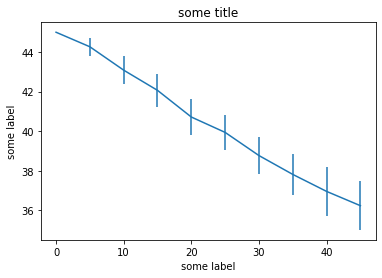

In [26]:
# Generate the Plot (with Error Bars)
plt.errorbar(avg_tumor_volume_drug_timepoint_pivot.index, avg_tumor_volume_drug_timepoint_pivot["Capomulin"], yerr=sem_tumor_volume_drug_timepoint_pivot["Capomulin"])

plt.title("some title")
plt.ylabel("some label")
plt.xlabel("some label")

# Save the Figure
# plt.savefig("name_of_directory/name_of_the_file.png")

# Show the Figure
plt.show()